<h1><center>DOSBOL ALIEV</center></h1>
<h1><center>MYUH 1867424</center></h1>
<h1><center>PCA EXTRA CREDIT</center></h1>

In [125]:
#PCA
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.DataFrame(columns=['Student ID',"Exam 1","Exam 2","Exam 3"])

In [126]:
 df.loc[0] = ['Student 1',90.5,100,92]
df.loc[1] = ['Student 2', 44.5,91,72]
df.loc[2] = ['Student 3', 41,89,40]
df.loc[3] = ['Student 4', 31,75,29]
df.loc[4] = ['Student 5', 58.5,97,75]
df.loc[5] = ['Student 6', 77.5,100,89]
df.loc[6] = ['Student 7', 85,100,99]
df.loc[7] = ['Student 8', 51,90,44]
df.loc[8] = ['Student 9', 60.5,100,69]
df.loc[9] = ['Student 10', 62,81,40]
df.loc[10] = ['Student 11', 77,100,72]
df.loc[11] = ['Student 12', 51.5,96,74]

In [127]:
df


,Student ID,Exam 1,Exam 2,Exam 3
0,Student 1,90.5,100,92
1,Student 2,44.5,91,72
2,Student 3,41.0,89,40
3,Student 4,31.0,75,29
4,Student 5,58.5,97,75
5,Student 6,77.5,100,89
6,Student 7,85.0,100,99
7,Student 8,51.0,90,44
8,Student 9,60.5,100,69
9,Student 10,62.0,81,40


In [128]:
# X is feature vectors
X = df[['Exam 1','Exam 2',"Exam 3"]]


In [129]:
X.head(9)


,Exam 1,Exam 2,Exam 3
0,90.5,100,92
1,44.5,91,72
2,41.0,89,40
3,31.0,75,29
4,58.5,97,75
5,77.5,100,89
6,85.0,100,99
7,51.0,90,44
8,60.5,100,69


In [130]:
Y = df[['Student ID']]
Y.head(10)


,Student ID
0,Student 1
1,Student 2
2,Student 3
3,Student 4
4,Student 5
5,Student 6
6,Student 7
7,Student 8
8,Student 9
9,Student 10


In [131]:
 from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)


In [132]:
x_std

array([[ 1.67950689,  0.84471295,  1.17898576],
       [-0.92467233, -0.28157098,  0.26326867],
       [-1.1228164 , -0.5318563 , -1.20187869],
       [-1.68894232, -2.28385353, -1.70552309],
       [-0.13209605,  0.46928497,  0.40062623],
       [ 0.94354319,  0.84471295,  1.0416282 ],
       [ 1.36813763,  0.84471295,  1.49948674],
       [-0.55669048, -0.40671364, -1.01873527],
       [-0.01887086,  0.84471295,  0.1259111 ],
       [ 0.06604802, -1.53299758, -1.20187869],
       [ 0.9152369 ,  0.84471295,  0.26326867],
       [-0.52838419,  0.34414231,  0.35484037]])

In [133]:
 import numpy as np
# features are columns from x_std
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)


[[1.09090909 0.7931588  0.86244769]
 [0.7931588  1.09090909 0.95439631]
 [0.86244769 0.95439631 1.09090909]]


In [134]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [135]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.55801944  0.80747857 -0.19129207]
 [ 0.5795626  -0.54421384 -0.60657933]
 [ 0.5939036  -0.22761733  0.77166629]]


In [136]:
 print('\nEigenvalues \n%s' %eig_vals)



Eigenvalues 
[2.83259745 0.31323392 0.12689591]


In [137]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough)␣
eig_vals[0] / sum(eig_vals)


0.8655158871588083

In [138]:
projected_X = x_std.dot(eig_vecs.T[0])


In [139]:
projected_X

array([ 2.12696543, -0.52281694, -1.64859749, -3.27901506,  0.43620122,
        1.63470622,  2.14356202, -1.15139068,  0.55381278, -1.56541207,
        1.15664023,  0.11534434])

In [140]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [141]:
result.head(10)


,PC1,y-axis,label
0,2.126965,0.0,Student 1
1,-0.522817,0.0,Student 2
2,-1.648597,0.0,Student 3
3,-3.279015,0.0,Student 4
4,0.436201,0.0,Student 5
5,1.634706,0.0,Student 6
6,2.143562,0.0,Student 7
7,-1.151391,0.0,Student 8
8,0.553813,0.0,Student 9
9,-1.565412,0.0,Student 10


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

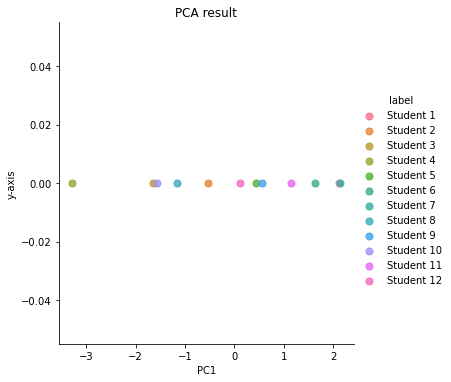

In [143]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, # x-axis, y-axis, data, no line)
scatter_kws={"s": 50}, # marker size
hue="label") # color
# title
plt.title('PCA result')
